<img src='slides/19.png'>

In [1]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

# species 列を削除
X = iris.drop(['species'], axis=1)

### 正規化 (Normalization)

データが0から1の範囲に収まるように変換

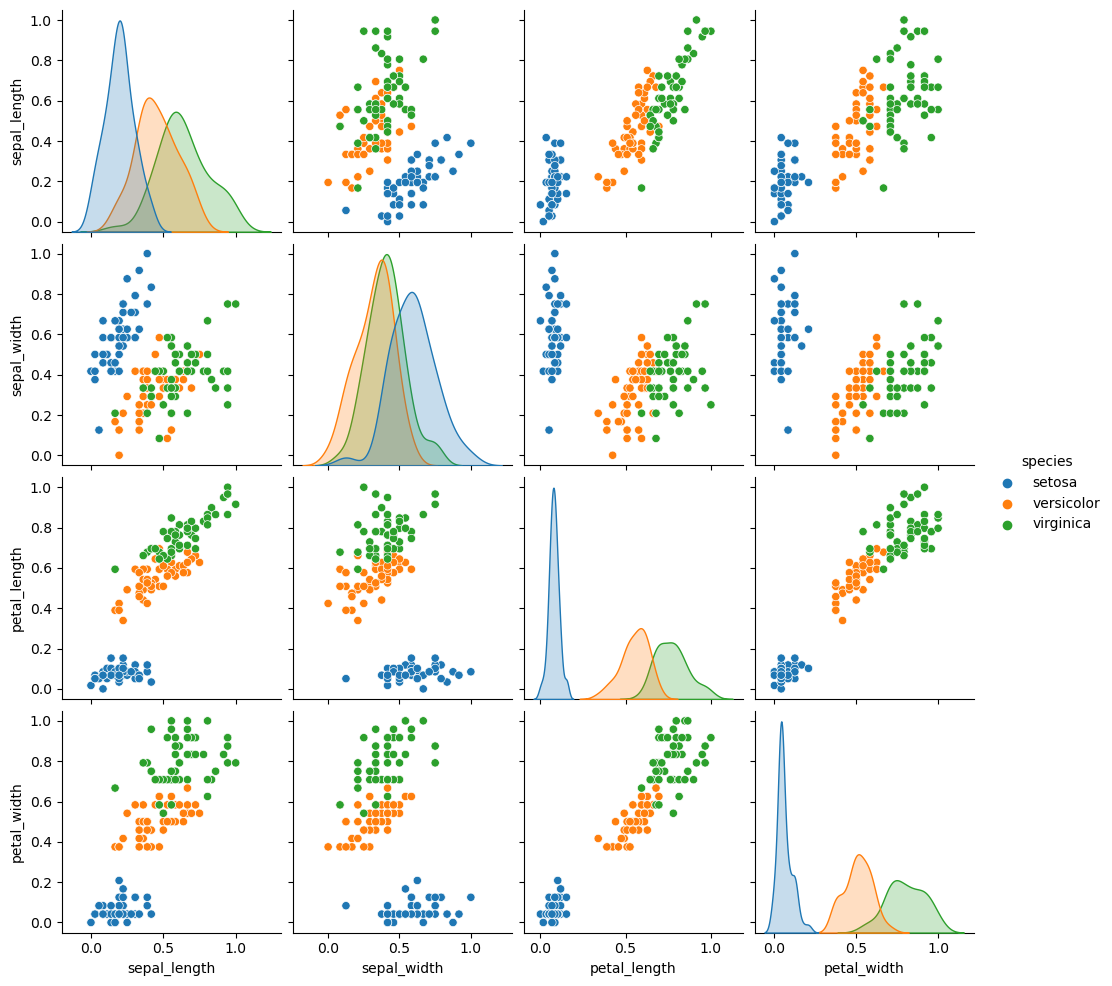

In [2]:
# 正規化
from sklearn.preprocessing import MinMaxScaler

# MinMaxScalerの初期化
mm = MinMaxScaler()
mm.fit(X)

# transform() により変換した DataFrame を作成
X_mm = pd.DataFrame(mm.transform(X), index=X.index, columns=X.columns)

# species 列を付加
X_mm['species'] = iris['species']

# species で色分けした散布図
sns.pairplot(X_mm, hue='species')

### 標準化 (Standardization)

分布を標準偏差をもとに調整する方法

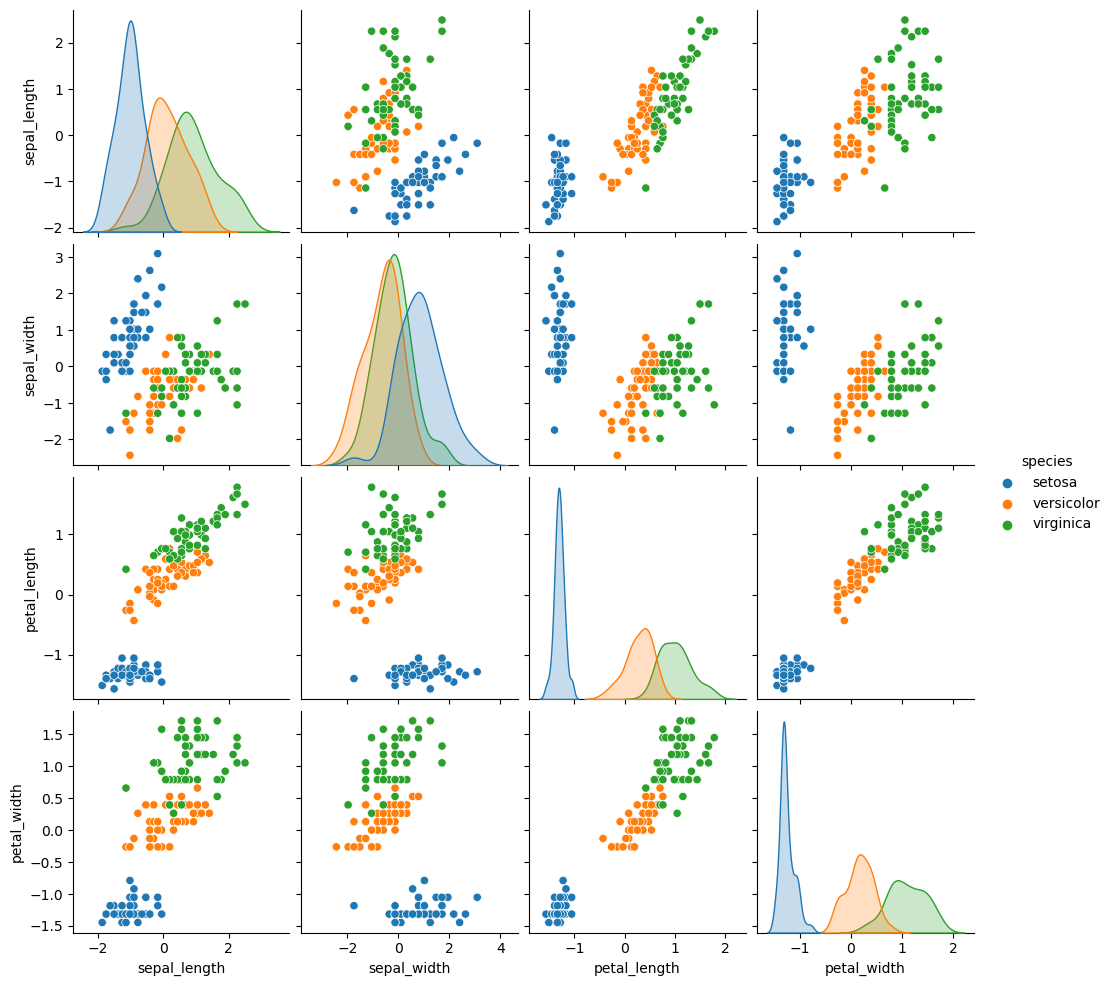

In [3]:
# 標準化
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# StandardScaler
sc = StandardScaler()
sc.fit(X)

# transform() により変換した DataFrame を作成
X_std = pd.DataFrame(sc.transform(X), index=X.index, columns=X.columns)

# species 列を付加
X_std['species'] = iris['species']

# species で色分けした散布図
sns.pairplot(X_std, hue='species')

# 2022年度 (matplotlib 3.5.2) では必要
plt.show()

### K-Means によるクラスタリングの結果を比較

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_plot(df):
    # 散布図で見やすいように、分類への影響が小さい sepal_length, sepal_width 列を削除
    df= df.drop(['sepal_length', 'sepal_width', 'species'], axis=1)

    # クラスタ数 3 で K-Means によりクラスタリング
    model = KMeans(n_clusters=3)
    model.fit(df)

    # クラスタリング結果を散布図で描画
    sns.scatterplot(x=df.petal_length, y=df.petal_width, hue=model.labels_)

    # 重心をプロット
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
                marker='*', color='red', s=150)
    plt.show()

- もとのデータ

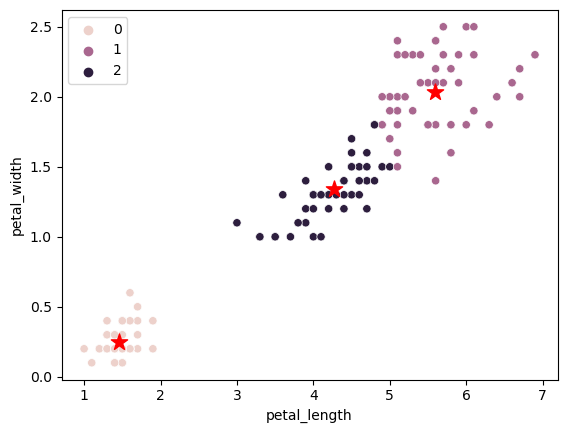

In [5]:
kmeans_plot(iris)

- MinMaxScalerで正規化
  - 右側の近い2つのクラスタの境界で、微妙に違う（場合があるかもしれない）程度の差。

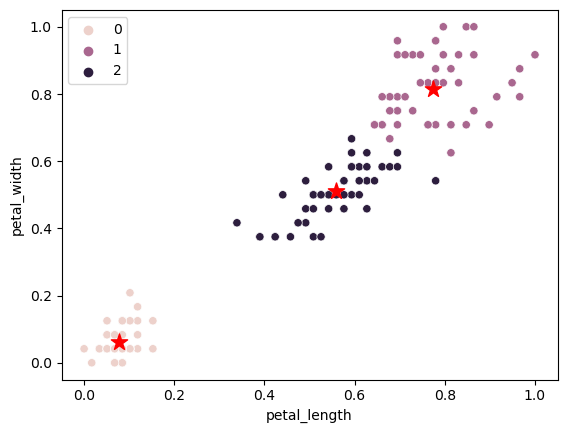

In [6]:
kmeans_plot(X_mm)

- StandardScalerで標準化

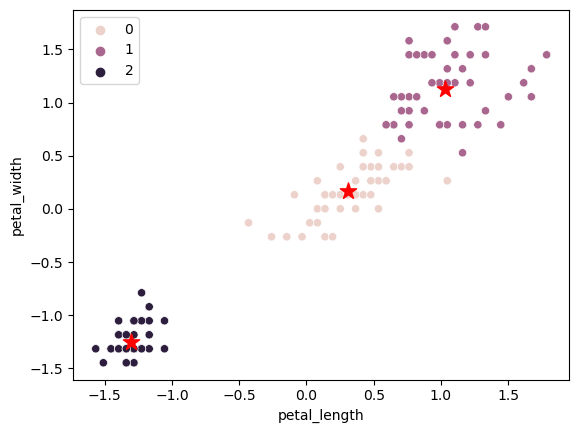

In [7]:
kmeans_plot(X_std)